In [1]:
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split



In [2]:
def train_test()->None:
    "traing a sklearn digit classifier"
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))
    xtrain, xtest, ytrain, ytest = train_test_split(data, digits.target, test_size= 0.2, shuffle=False)
    model = SVC(gamma=0.001)
    model.fit(xtrain, ytrain)
    test_acc = model.score(xtest, ytest)
    print(f"the test accuracy is : {test_acc}")

train_test()

the test accuracy is : 0.9583333333333334


![Screenshot 2024-07-06 at 10.20.16 AM.png](<attachment:Screenshot 2024-07-06 at 10.20.16 AM.png>)
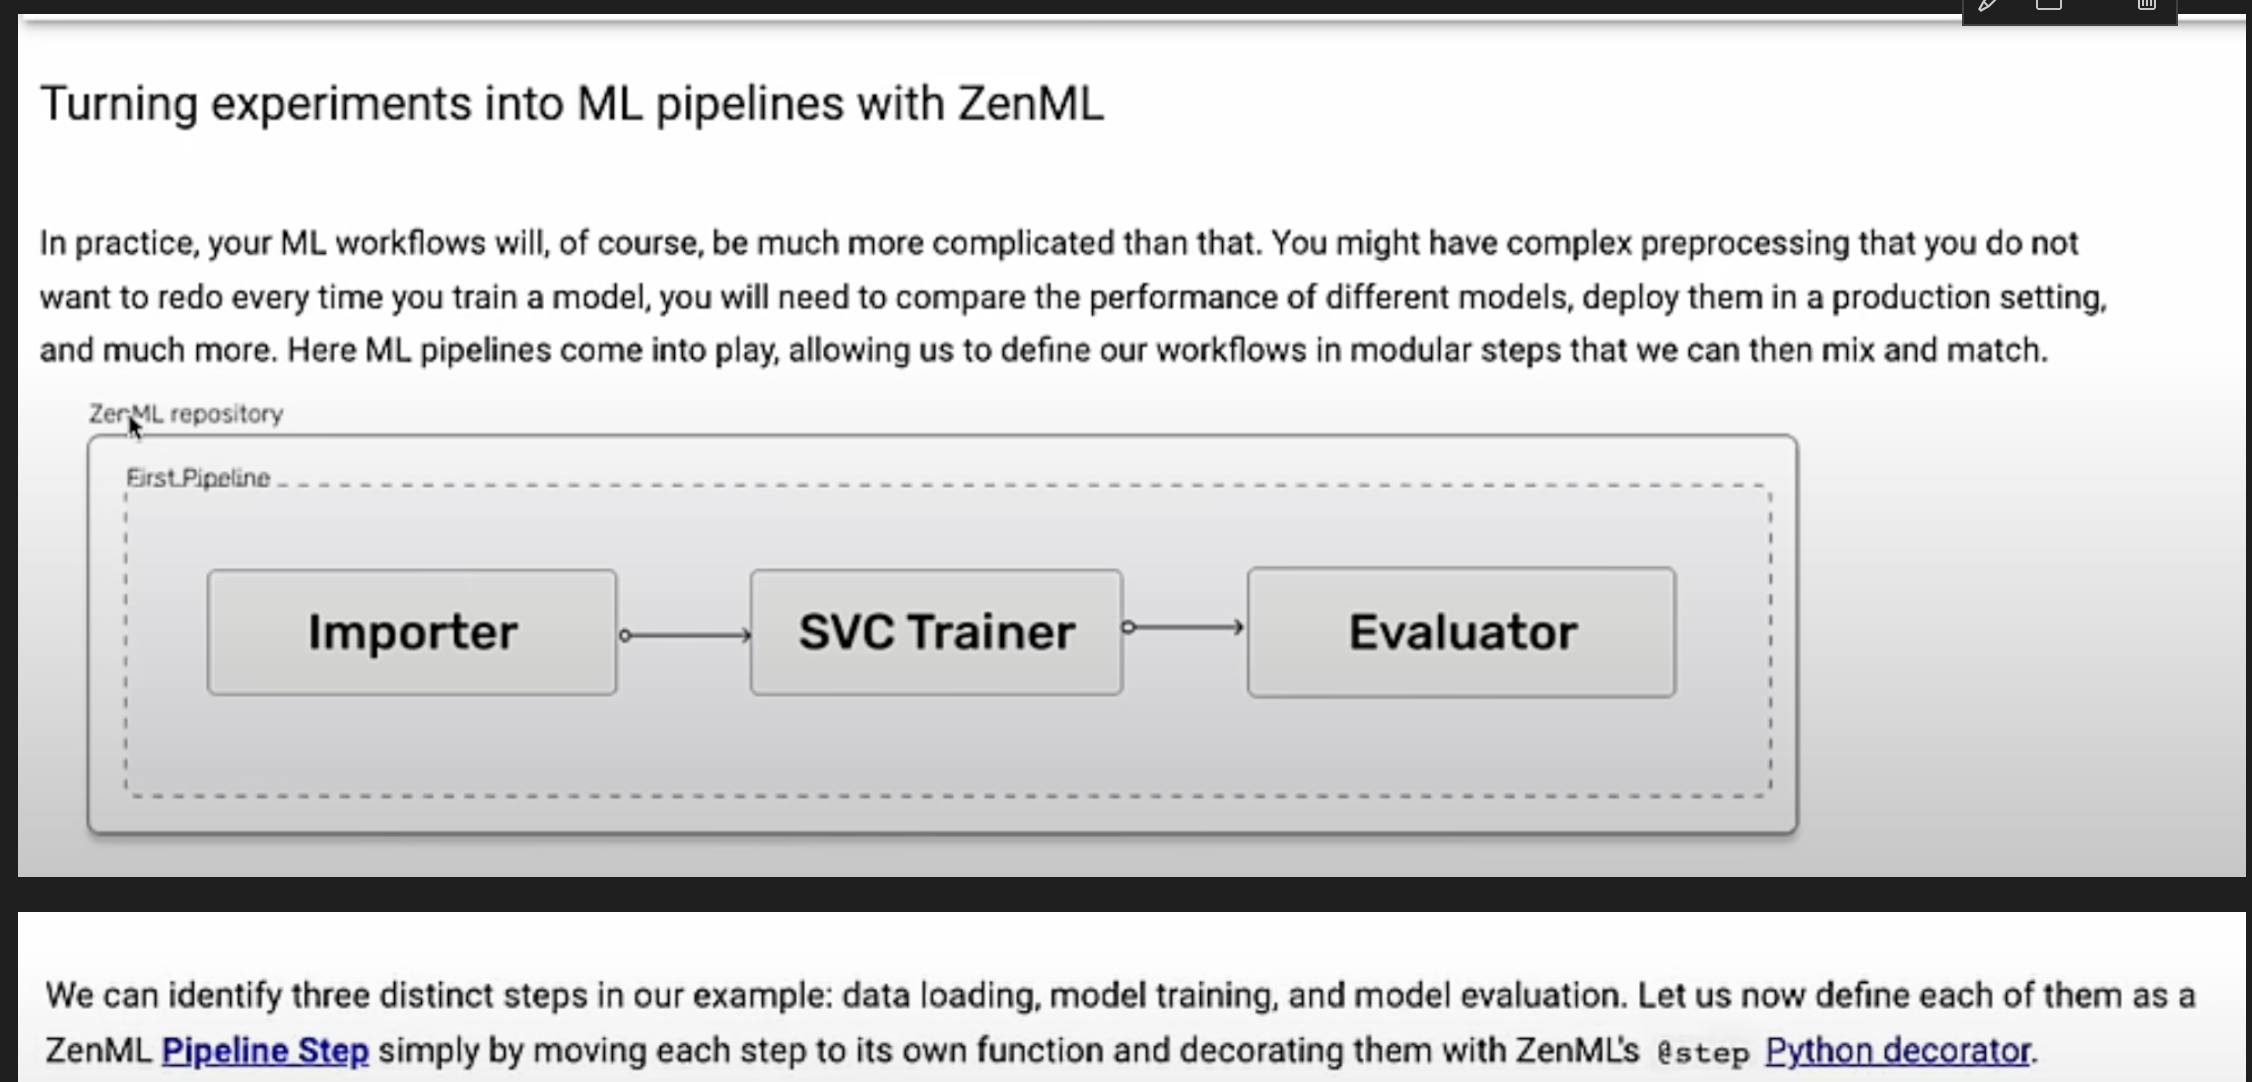

In [3]:
from zenml import step
from typing_extensions import Annotated
import pandas as pd
from typing import Tuple

@step
def importer() -> Tuple[
    Annotated[np.ndarray,"x_train" ],
    Annotated[np.ndarray, "x_test"],
    Annotated[np.ndarray, "y_train"],
    Annotated[np.ndarray, "y_test"]
]:
    "loading the digits dataset as numpy array"
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))
    x_train, x_test, y_train, y_test = train_test_split(
        data,  digits.target, test_size=0.2, shuffle=False
    )
    return x_train, x_test, y_train, y_test

@step 
def svcTrainer(
    x_train: np.ndarray,
    y_train: np.ndarray
) -> ClassifierMixin:
    "train an sklearn classifier"
    model = SVC(gamma=0.001)
    model.fit(x_train,y_train)
    return model


@step 
def evaluate(
 x_test: np.ndarray,
 y_test: np.ndarray,
 model: ClassifierMixin
) -> float:
    "calculate the test set accuracy of an sklearn model"
    test_acc = model.score(x_test, y_test)
    print(f"Test Accuracy : {test_acc}")
    return test_acc

![Screenshot 2024-07-06 at 10.22.09 AM.png](<attachment:Screenshot 2024-07-06 at 10.22.09 AM.png>)
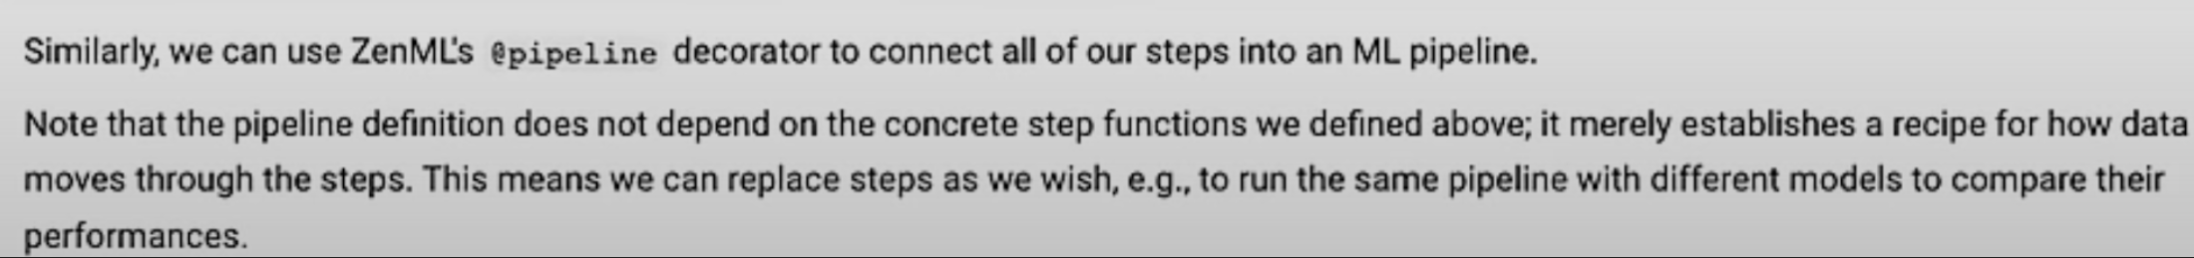

In [4]:
from zenml import pipeline

@pipeline
def digits_pipeline():
    "linking all the steps into single pipeline"
    x_train, x_test, y_train, y_test = importer()
    model = svcTrainer(x_train = x_train , y_train=y_train)
    evaluate(x_test=x_test, y_test=y_test, model=model)

![Screenshot 2024-07-06 at 10.21.27 AM.png](<attachment:Screenshot 2024-07-06 at 10.21.27 AM.png>)
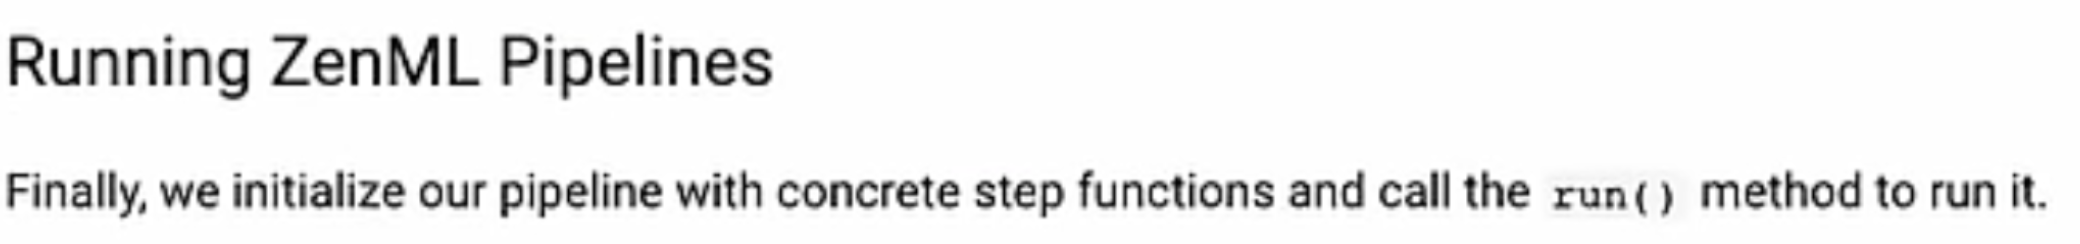

In [5]:
digit_svm_pipeline = digits_pipeline()


Initiating a new run for the pipeline: digits_pipeline.
Reusing registered pipeline version: (version: 1).
Executing a new run.
Using user: default
Using stack: default
  orchestrator: default
  artifact_store: default
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml up.
Using cached version of importer.
Step importer has started.
Using cached version of svcTrainer.
Step svcTrainer has started.
Using cached version of evaluate.
Step evaluate has started.
Pipeline run has finished in 1.270s.


![Screenshot 2024-07-06 at 10.22.41 AM.png](<attachment:Screenshot 2024-07-06 at 10.22.41 AM.png>)
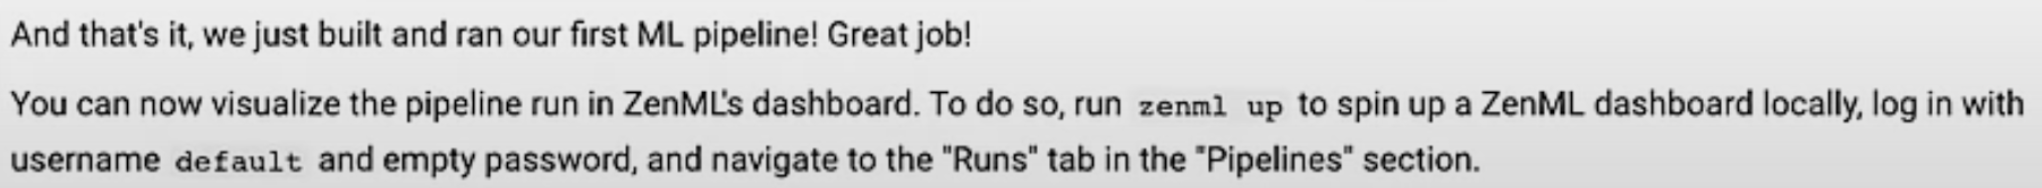